# Esercitazione 12
Questa è l'esercitazione 12, con le DNN e CNN.

##  Esercizio 12.1

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
# print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
# plt.matshow(X_train[26579,:].reshape(28,28),cmap='binary')
# plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
# print('... and with label', Y_train[26579], 'after to_categorical')
# print()
# print('X_train shape:', X_train.shape)
# print('Y_train shape:', Y_train.shape)

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


print('Model architecture created successfully!')


from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

def compile_model_2():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

2023-10-28 21:40:16.195029: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 21:40:16.300632: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 21:40:16.302775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 21:40:18.446244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [2]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()
model_DNN_2 = compile_model_2()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

history_2 = model_DNN_2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2023-10-28 21:40:27.415662: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.8164 - acc: 0.7564 - val_loss: 0.3305 - val_acc: 0.9094
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4010 - acc: 0.8852 - val_loss: 0.2464 - val_acc: 0.9300
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3187 - acc: 0.9092 - val_loss: 0.2088 - val_acc: 0.9398
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2738 - acc: 0.9218 - val_loss: 0.1800 - val_acc: 0.9480
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2376 - acc: 0.9336 - val_loss: 0.1615 - val_acc: 0.9521
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2162 - acc: 0.9403 - val_loss: 0.1457 - val_acc: 0.9560
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1953 - acc: 0.9443 - val_loss: 0.1312 - val_acc: 0.9587
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/st

2023-10-28 21:44:22.143608: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.2866 - acc: 0.9168 - val_loss: 0.1081 - val_acc: 0.9658
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1243 - acc: 0.9652 - val_loss: 0.1007 - val_acc: 0.9676
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0877 - acc: 0.9744 - val_loss: 0.0825 - val_acc: 0.9754
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0952 - val_acc: 0.9741
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0580 - acc: 0.9829 - val_loss: 0.0777 - val_acc: 0.9786
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0790 - val_acc: 0.9803
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - acc: 0.9875 - val_loss: 0.0807 - val_acc: 0.9800
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step

In [3]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

313/313 [==============================] - 1s 3ms/step


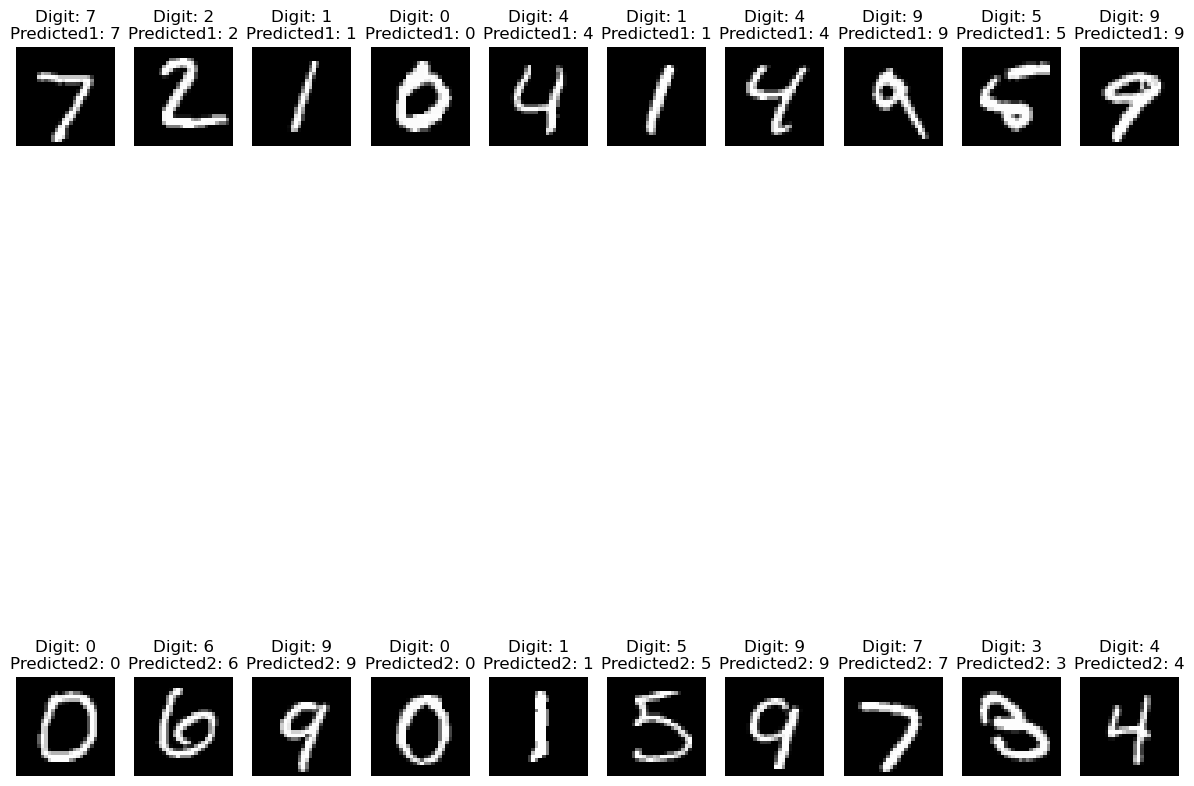

'\nfor i in range(10):    \n    ax_2 = plt.subplot(2, 10, i + 1)    \n    plt.imshow(X_test[i, :, :, 0], cmap=\'gray\')    \n    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_2[i])))    \n    plt.axis(\'off\') \nplt.show()'

In [4]:
predictions = model_DNN.predict(X_test)
predictions_2 = model_DNN_2.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    if i<10:
        plt.title("Digit: {}\nPredicted1: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off')
    else:
        plt.title("Digit: {}\nPredicted2: {}".format(np.argmax(Y_test[i]), np.argmax(predictions_2[i])))    
        plt.axis('off')
plt.show()
  
'''
for i in range(10):    
    ax_2 = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_2[i])))    
    plt.axis('off') 
plt.show()'''

313/313 [==============================] - 1s 3ms/step - loss: 0.1434 - acc: 0.9797

Test loss: 0.0758148655295372
Test accuracy: 0.9757000207901001

Test loss: 0.14342612028121948
Test accuracy: 0.9797000288963318


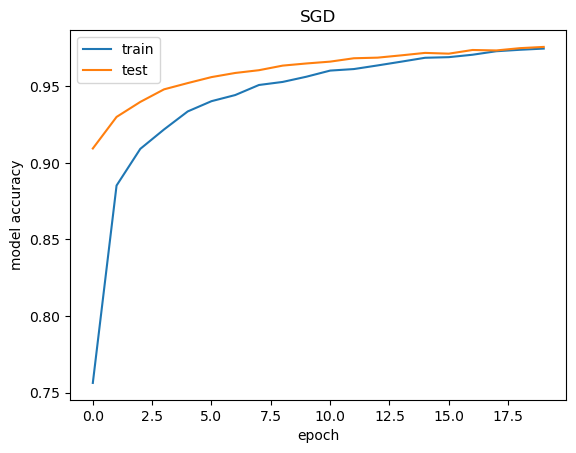

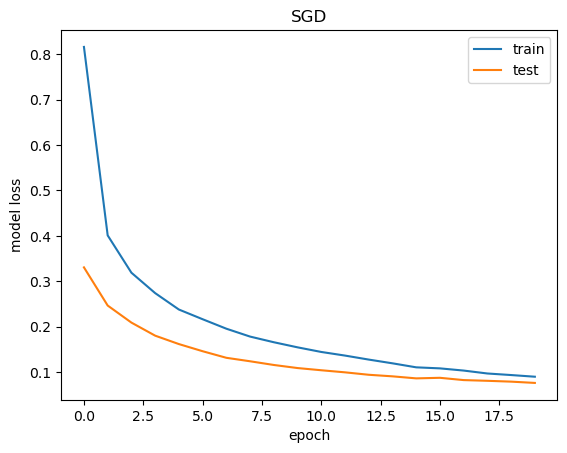

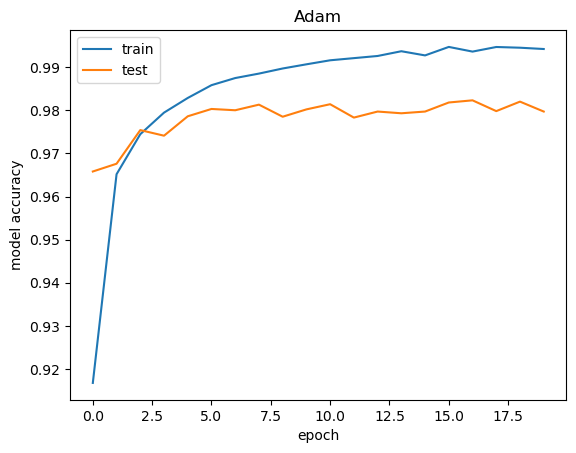

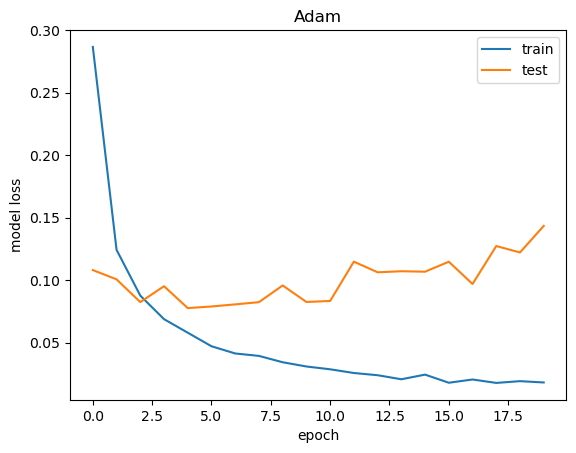

In [5]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
score2 = model_DNN_2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

# look into training history

# summarize history for accuracy
plt.title('SGD')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.title('SGD')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


# summarize history for accuracy
plt.title('Adam')
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.title('Adam')
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()